In [39]:
import numpy as np
from scipy.stats import rv_continuous, expon, erlang
from scipy.stats.distributions import uniform
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
import pylab as py

# EX1

In [2]:
true_alpha = 5
n = 200

In [3]:
def pdf(x, alpha=5):
    return (alpha + 1)*np.power(x, alpha)

def get_samples(n, alpha):
    x = np.linspace(0,1,1000000)
    fit_pdf = pdf(x)
    return np.random.choice(x, size=n, p=fit_pdf/np.sum(fit_pdf)) 

## d)

In [4]:
def get_mle(ns):
    return -1-len(ns)/(np.sum(np.log(ns)))

def get_mom(ns):
    avg = np.average(ns)
    return (2*avg - 1)/(1-avg)

In [5]:
ns = get_samples(n, true_alpha)
mle = get_mle(ns)
mom = get_mom(ns)
print(5-mle, 5-mom, (mle-5)**2, (mom-5)**2)

-0.44603401475867965 -0.37013821897335486 0.19894634232174607 0.1370023011447672


## e)

In [6]:
num_exp = 1000
sample_size = 200

In [7]:
mles = np.zeros(num_exp)
moms = np.zeros(num_exp)

for i in tqdm(range(num_exp)):
    ns = get_samples(sample_size, true_alpha)
    mles[i] = get_mle(ns)
    moms[i] = get_mom(ns)

100%|███████████████████████████████████████| 1000/1000 [00:31<00:00, 32.10it/s]


PLOTS

Text(0.5, 1.0, 'MLE')

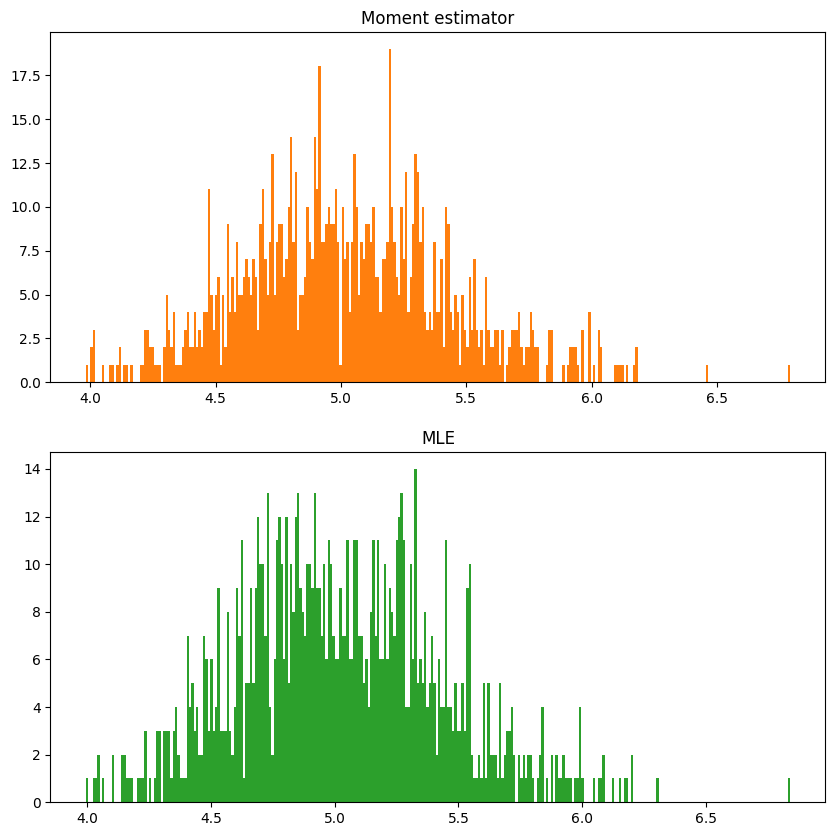

In [8]:
fig, axs = plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)
axs[0].hist(moms, color='C1', bins=300)
axs[0].set_title('Moment estimator')
axs[1].hist(mles, color='C2', bins=300)
axs[1].set_title('MLE')

([<matplotlib.axis.XTick at 0x7fe22d10b820>,
 [Text(1, 0, 'MLE'), Text(2, 0, 'MOM')])

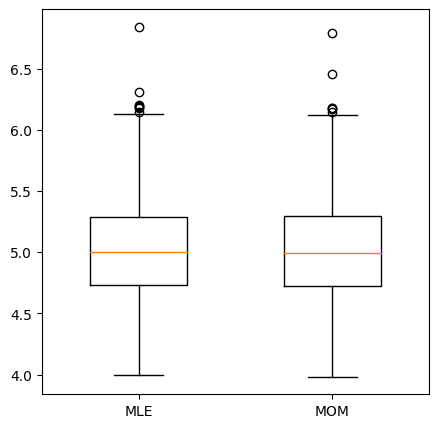

In [9]:
fig = plt.figure(figsize =(5, 5))
ax = fig.add_subplot()
ax.boxplot([mles, moms],widths=0.5)
plt.xticks([1, 2], ['MLE', 'MOM'])
# ax.set_aspect(0.2)

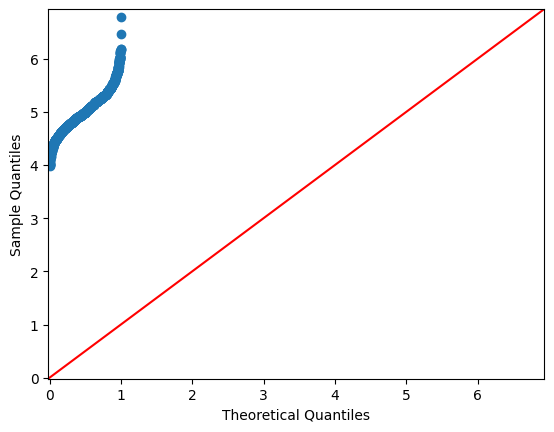

In [51]:
import numpy as np
import statsmodels.api as sm
import pylab as py
sm.qqplot(moms, line ='45', fit=False, dist=uniform)
py.show()

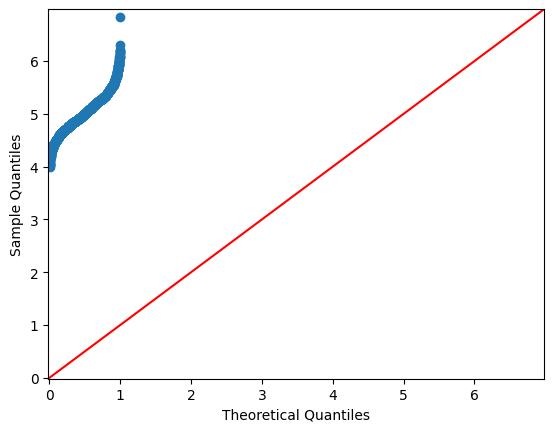

In [50]:
sm.qqplot(mles, line ='45',  dist=uniform)
py.show()

In [12]:
print(mles.var())
print(moms.var())
print((5-mles).mean())
print((5-moms).mean())
print(((5-mles)**2).mean())
print(((5-moms)**2).mean())

0.1709457621329646
0.17426104462026
-0.027046283736376603
-0.021258845644858304
0.17167726359691318
0.1747129831384119


In [13]:
36/20

1.8

In [14]:
st.t.interval(alpha=0.95, df=len(mles)-1,
              loc=np.mean(mles),
              scale=st.sem(mles))

/tmp/ipykernel_4217/2559584233.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(mles)-1,


(5.001376571202835, 5.052715996269919)

In [15]:
st.t.interval(alpha=0.95, df=len(moms)-1,
              loc=np.mean(moms),
              scale=st.sem(moms))

/tmp/ipykernel_4217/2482418099.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(moms)-1,


(4.995341412176984, 5.0471762791127315)

# EX2

## c)

In [16]:
def p_val5(ns):
    mean = ns.mean()
    suma = 0
    n = len(ns)
    for i in range(n):
        prod = 1.0
        for j in range(1,i+1):
            prod *= (5.0*n*mean)/j
        prod /= np.exp(5.0*n*mean)
        suma+=prod
    return suma

def p_val3(ns):
    mean = ns.mean()
    suma = 0
    n = len(ns)
    for i in range(n):
        prod = 1.0
        for j in range(1,i+1):
            prod *= (3.0*n*mean)/j
        prod /= np.exp(3.0*n*mean)
        suma+=prod
    return 1-suma

In [17]:
ns0 = np.random.exponential(1/5,20)
ns1 = np.random.exponential(1/3,20)

In [18]:
print(p_val5(ns0))
print(p_val5(ns1))
print(p_val3(ns0))
print(p_val3(ns1))

0.22248591776712592
0.16364218248273865
0.0744143528706368
0.1036089245193067


In [19]:
results0 = np.zeros(1000)
results1 = np.zeros(1000)
sums1 = np.zeros(1000)

In [45]:
for i in range(1000):
    ns0 = np.random.exponential(1/5,200)
    ns1 = np.random.exponential(1/3,200)
    sums1[i] = ns1.sum()
    results0[i] = p_val5(ns0)
    results1[i] = p_val5(ns1)

Text(0.5, 1.0, '$H_0$ p-values')

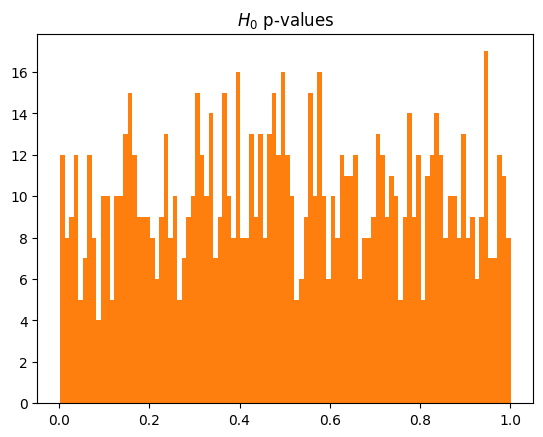

In [21]:
plt.hist(results0, color='C1', bins=np.arange(min(results0), max(results0)+0.01, step=0.01))
plt.title('$H_0$ p-values')

Text(0.5, 1.0, '$\\log{H_1}$ p-values')

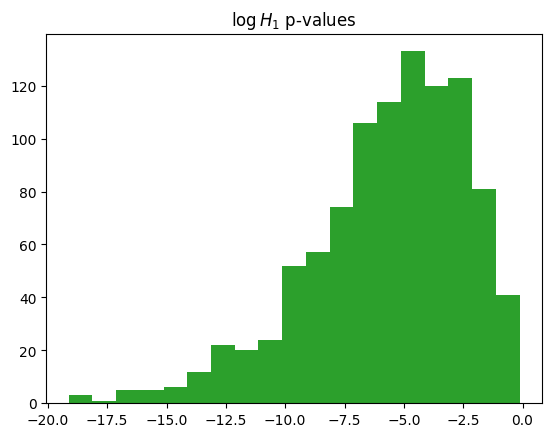

In [22]:
plt.hist(np.log(results1), color='C2', bins=np.arange(min(np.log(results1)), max(np.log(results1))+0.000000001, step=1))
plt.title('$\log{H_1}$ p-values')

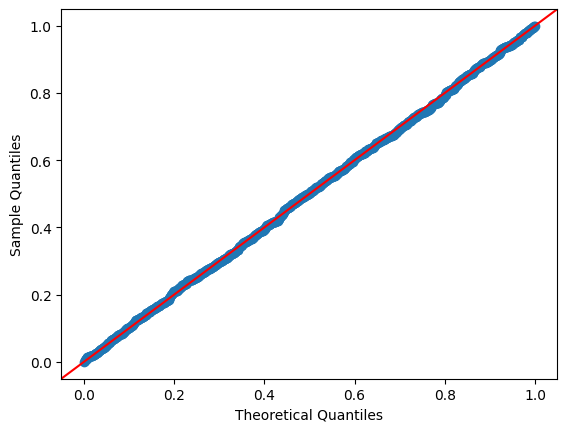

In [46]:
sm.qqplot(results0, line ='45', fit=False, dist=uniform)
py.show()

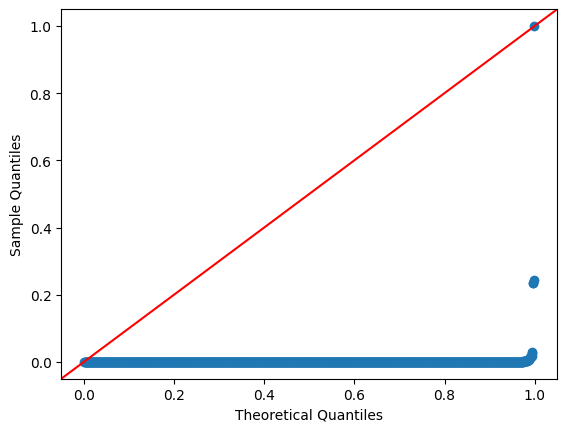

In [49]:
sm.qqplot(results1, line ='45', fit=True, dist=uniform)
py.show()

In [25]:
st.t.interval(alpha=0.95, df=len(results0)-1,
              loc=np.mean(results0),
              scale=st.sem(results0))

/tmp/ipykernel_4217/3400692933.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(results0)-1,


(0.48919591969941967, 0.5242875240097137)

In [26]:
np.sum(results0 < 0.05) / 1000

0.044

In [27]:
results0.mean()

0.5067417218545667

In [28]:
results0.sort()

In [29]:
results0[50]

0.056833079692040905

In [30]:
ks = erlang.ppf(0.05, 200, scale=1/3)

In [31]:
k = np.exp(-2*ks)*np.power(5/3,200)

In [32]:
ks

59.106829011013744

In [33]:
k

1.0720389351900023e-07

In [34]:
st.t.interval(alpha=0.95, df=len(sums1)-1,
              loc=np.mean(sums1),
              scale=st.sem(sums1))

/tmp/ipykernel_4217/3543466085.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.95, df=len(sums1)-1,


(6.599536595153122, 6.776149279856462)

In [35]:
sums1.sort()
sums1[50]

4.465472988242991

In [36]:
np.log(np.power((3/5), 200)*1.0720389351900023e-07)/-2

59.106829011013744